# 1) 데이터에 대한 이해와 전처리

In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer #토크나이저 => 단어집합을 생성시켜준다.
from tensorflow.keras.preprocessing.sequence import pad_sequences # 벡터를 패딩시켜준다.
from tensorflow.keras.utils import to_categorical #원-핫 인코딩|

# 코퍼스

In [2]:
text = """경마장에 있는 말이 뛰고 있다\n
그의 말이 법이다\n
가는 말이 고와야 오는 말이 곱다\n"""

In [3]:
#단어집합을 생성하고 크기를 확인
# 1. 정수 인코딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text]) #단어 집합을 생성
print(tokenizer.word_index)
vocab_size = len(tokenizer.word_index)+1 #패딩을 위한 0을 고려
print('단어집합의 크기 %d' % vocab_size) 

{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '있다': 5, '그의': 6, '법이다': 7, '가는': 8, '고와야': 9, '오는': 10, '곱다': 11}
단어집합의 크기 12


# 훈련데이터 생성

In [4]:
sequences = list()
for line in text.split('\n'): # 줄바꿈 문자 기준으로 코퍼스 분리
    encoded = tokenizer.texts_to_sequences([line])[0] #문장을 정수 토큰화
    for i in range(1, len(encoded)): # 1~문장의 길이
        sequence = encoded[:i+1]
        sequences.append(sequence)

print('학습에 사용할 샘플의 개수: %d' % len(sequences))

학습에 사용할 샘플의 개수: 11


In [5]:
sequences
#위 데이터는 레이블로 사용될 단어를 분리하지 않은 훈련데이터이다.
#전체 훈련데이터에 대해서 맨 우측에 있는 단어만 대해서만 레이블로 븐리해야 합니다.

[[2, 3],
 [2, 3, 1],
 [2, 3, 1, 4],
 [2, 3, 1, 4, 5],
 [6, 1],
 [6, 1, 7],
 [8, 1],
 [8, 1, 9],
 [8, 1, 9, 10],
 [8, 1, 9, 10, 1],
 [8, 1, 9, 10, 1, 11]]

# 훈련데이터 길이 맞추기

In [6]:
max_len = max(len(l) for l in sequences) # 모든 샘플에서 길이가 가장 긴 샘플의 길이 출력
print('샘플의 최대 길이 : {}'.format(max_len))

샘플의 최대 길이 : 6


In [7]:
#전체 샘플의 길이를 6으로 맞춰준다.
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')

In [8]:
sequences

array([[ 0,  0,  0,  0,  2,  3],
       [ 0,  0,  0,  2,  3,  1],
       [ 0,  0,  2,  3,  1,  4],
       [ 0,  2,  3,  1,  4,  5],
       [ 0,  0,  0,  0,  6,  1],
       [ 0,  0,  0,  6,  1,  7],
       [ 0,  0,  0,  0,  8,  1],
       [ 0,  0,  0,  8,  1,  9],
       [ 0,  0,  8,  1,  9, 10],
       [ 0,  8,  1,  9, 10,  1],
       [ 8,  1,  9, 10,  1, 11]])

# 각 샘플의 마지막 단어를 레이블로 분리

In [9]:
#레이블븐리는 Numpy를 사용해서 가능
import numpy as np
np.array(sequences)

array([[ 0,  0,  0,  0,  2,  3],
       [ 0,  0,  0,  2,  3,  1],
       [ 0,  0,  2,  3,  1,  4],
       [ 0,  2,  3,  1,  4,  5],
       [ 0,  0,  0,  0,  6,  1],
       [ 0,  0,  0,  6,  1,  7],
       [ 0,  0,  0,  0,  8,  1],
       [ 0,  0,  0,  8,  1,  9],
       [ 0,  0,  8,  1,  9, 10],
       [ 0,  8,  1,  9, 10,  1],
       [ 8,  1,  9, 10,  1, 11]])

In [10]:
# X : 리스트의 마지막 값을 제외하고 저장 -> 입력데이터
# y : 리스트의 마지막 값만을 저장 -> 레이블 
sequences = np.array(sequences)
X = sequences[:,:-1] # 2차원 배열
y = sequences[:,-1] # 1차원 벡터(레이블)

In [11]:
X

array([[ 0,  0,  0,  0,  2],
       [ 0,  0,  0,  2,  3],
       [ 0,  0,  2,  3,  1],
       [ 0,  2,  3,  1,  4],
       [ 0,  0,  0,  0,  6],
       [ 0,  0,  0,  6,  1],
       [ 0,  0,  0,  0,  8],
       [ 0,  0,  0,  8,  1],
       [ 0,  0,  8,  1,  9],
       [ 0,  8,  1,  9, 10],
       [ 8,  1,  9, 10,  1]])

In [12]:
y

array([ 3,  1,  4,  5,  1,  7,  1,  9, 10,  1, 11])

# 원-핫 인코딩

In [13]:
# 레이블이 분리되었습니다. RNN 모델에 훈련 데이터를 훈련 시키기 전에 레이블에 대해서 원-핫 인코딩을 수행합니다.
y = to_categorical(y, num_classes=vocab_size)

In [14]:
y

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

# 모델설계하기

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN

In [16]:
#RNN모델에 데이터를 훈련시킵니다.
#다대일 구조의 RNN을 사용하빈다.
embedding_dim = 10 # 임베딩 벡터의 차원
hidden_units = 32 #은닉상태의 크기

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim)) #임베딩층 구성
model.add(SimpleRNN(hidden_units)) #은닉상태 크기
model.add(Dense(vocab_size, activation='softmax')) #출력층 (FC/ 출력 벡터로 단어크기만큼)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.fit(X, y, epochs=200, verbose=2)

#마지막 시점에서 모든 가능한 단어 중 하나의 단어를 예측하는 다중 클래스 분류 문제를 수행하는 모델

Epoch 1/200
1/1 - 1s - loss: 2.4713 - accuracy: 0.0909 - 947ms/epoch - 947ms/step
Epoch 2/200
1/1 - 0s - loss: 2.4575 - accuracy: 0.3636 - 2ms/epoch - 2ms/step
Epoch 3/200
1/1 - 0s - loss: 2.4439 - accuracy: 0.3636 - 2ms/epoch - 2ms/step
Epoch 4/200
1/1 - 0s - loss: 2.4304 - accuracy: 0.3636 - 2ms/epoch - 2ms/step
Epoch 5/200
1/1 - 0s - loss: 2.4169 - accuracy: 0.6364 - 2ms/epoch - 2ms/step
Epoch 6/200
1/1 - 0s - loss: 2.4032 - accuracy: 0.6364 - 2ms/epoch - 2ms/step
Epoch 7/200
1/1 - 0s - loss: 2.3892 - accuracy: 0.6364 - 2ms/epoch - 2ms/step
Epoch 8/200
1/1 - 0s - loss: 2.3748 - accuracy: 0.5455 - 2ms/epoch - 2ms/step
Epoch 9/200
1/1 - 0s - loss: 2.3600 - accuracy: 0.5455 - 2ms/epoch - 2ms/step
Epoch 10/200
1/1 - 0s - loss: 2.3447 - accuracy: 0.6364 - 998us/epoch - 998us/step
Epoch 11/200
1/1 - 0s - loss: 2.3288 - accuracy: 0.5455 - 2ms/epoch - 2ms/step
Epoch 12/200
1/1 - 0s - loss: 2.3123 - accuracy: 0.5455 - 2ms/epoch - 2ms/step
Epoch 13/200
1/1 - 0s - loss: 2.2951 - accuracy: 0.45

Epoch 103/200
1/1 - 0s - loss: 0.5175 - accuracy: 0.8182 - 2ms/epoch - 2ms/step
Epoch 104/200
1/1 - 0s - loss: 0.5078 - accuracy: 0.9091 - 2ms/epoch - 2ms/step
Epoch 105/200
1/1 - 0s - loss: 0.4982 - accuracy: 0.9091 - 2ms/epoch - 2ms/step
Epoch 106/200
1/1 - 0s - loss: 0.4889 - accuracy: 0.9091 - 2ms/epoch - 2ms/step
Epoch 107/200
1/1 - 0s - loss: 0.4797 - accuracy: 0.9091 - 2ms/epoch - 2ms/step
Epoch 108/200
1/1 - 0s - loss: 0.4707 - accuracy: 1.0000 - 3ms/epoch - 3ms/step
Epoch 109/200
1/1 - 0s - loss: 0.4619 - accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 110/200
1/1 - 0s - loss: 0.4533 - accuracy: 1.0000 - 3ms/epoch - 3ms/step
Epoch 111/200
1/1 - 0s - loss: 0.4448 - accuracy: 1.0000 - 997us/epoch - 997us/step
Epoch 112/200
1/1 - 0s - loss: 0.4365 - accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 113/200
1/1 - 0s - loss: 0.4283 - accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 114/200
1/1 - 0s - loss: 0.4203 - accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 115/200
1/1 - 0s - loss: 0.412

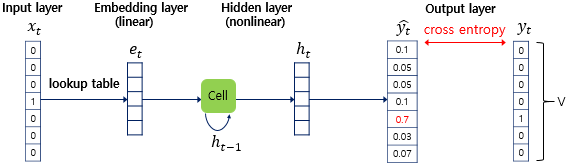


# 문장을 생성하는 함수

In [45]:
def sentence_generation(model, tokenizer, current_word, n): # 모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word = current_word #시작 단어
    sentence = ''
    # n번 반복 4번 반복 현재단어(t) +예측단어(t+1)+예측단어(t+2)+예측단어(t+3)+예측단어(t+4)
    for _ in range(n):
        # 현재 단어에 대한 정수 인코딩과 패딩
        encoded = tokenizer.texts_to_sequences([current_word])[0] #현재 단어 정수 인코딩
        encoded = pad_sequences([encoded], maxlen=5, padding='pre') #최대길이 5로 padding / 왜 5인가. 훈련 샘플 최대 길이 6에서 맨마지막 레이블 을 빼버렸으니 5이다.
        # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
        result = model.predict(encoded, verbose=0) # 엔트로파 벡터(에측 벡터)
        result= np.argmax(result, axis=1) #예측 벡터의 가장큰 값의 인덱스를 저장
        
    
        for word, index in tokenizer.word_index.items(): #단어사전에서
            # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면 break
            if index == result: #예측한 단어와 동일한 단어가 있다면
                break

        # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        current_word = current_word + ' '  + word

        # 예측 단어를 문장에 저장
        sentence = sentence + ' ' + word

    sentence = init_word + sentence
    return sentence

In [46]:
print(sentence_generation(model, tokenizer, '경마장에', 4))

경마장에 있는 말이 뛰고 있다


In [48]:
print(sentence_generation(model, tokenizer, '경마장에', 2)) # 두번 예측

경마장에 있는 말이


In [38]:
tokenizer.word_index

{'말이': 1,
 '경마장에': 2,
 '있는': 3,
 '뛰고': 4,
 '있다': 5,
 '그의': 6,
 '법이다': 7,
 '가는': 8,
 '고와야': 9,
 '오는': 10,
 '곱다': 11}